# Ridge Regression and the Lasso

In [5]:
library(ISLR)
Hitters <- na.omit(Hitters)

# install.packages("glmnet")
# glmnet does not use the model formula language, so we will set up a y and x.
library(glmnet)

In [10]:
# The argument Salary ~ . - 1 specifies the response variable (Salary)
# and the predictor variables (. means all variables in the data frame, - 1 means to exclude the intercept)
# The resulting matrix x will have as many rows as there are observations in Hitters
# and as many columns as there are predictor variables (excluding the intercept) in the model.
x <- model.matrix(Salary ~ . - 1, data = Hitters)
y <- Hitters$Salary

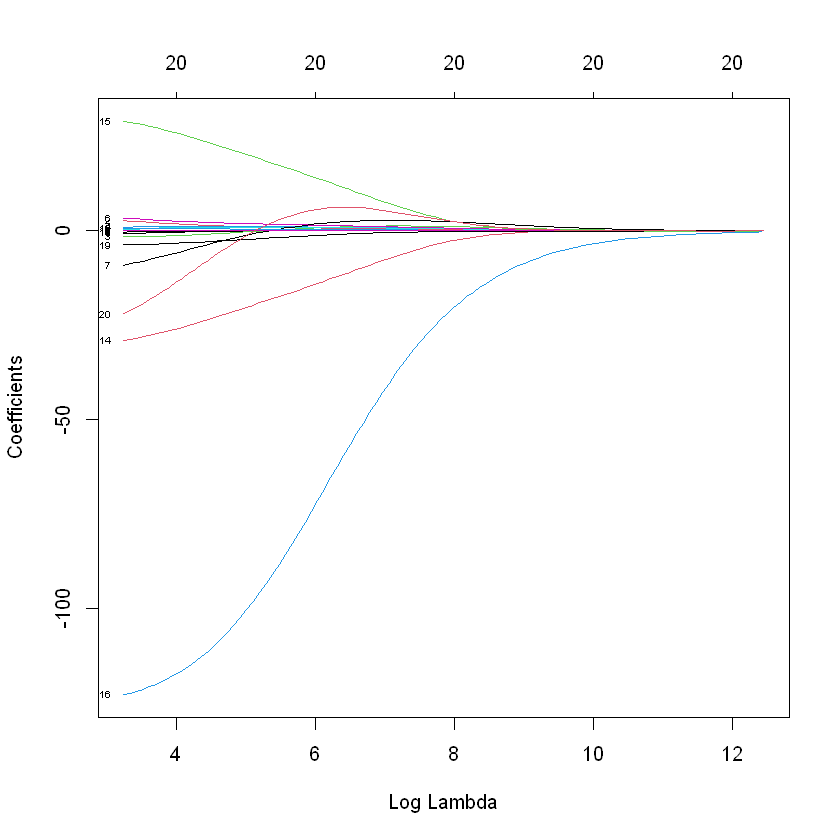

In [12]:
# First we will fit a ridge regression model by calling glmnet with alpha=0 (alpha=1 is Lasso)
# Alphas between 0 and 1 are what's called elastic net models.
fit.ridge <- glmnet(x, y, alpha = 0)
plot(fit.ridge, xvar = "lambda", label = TRUE)

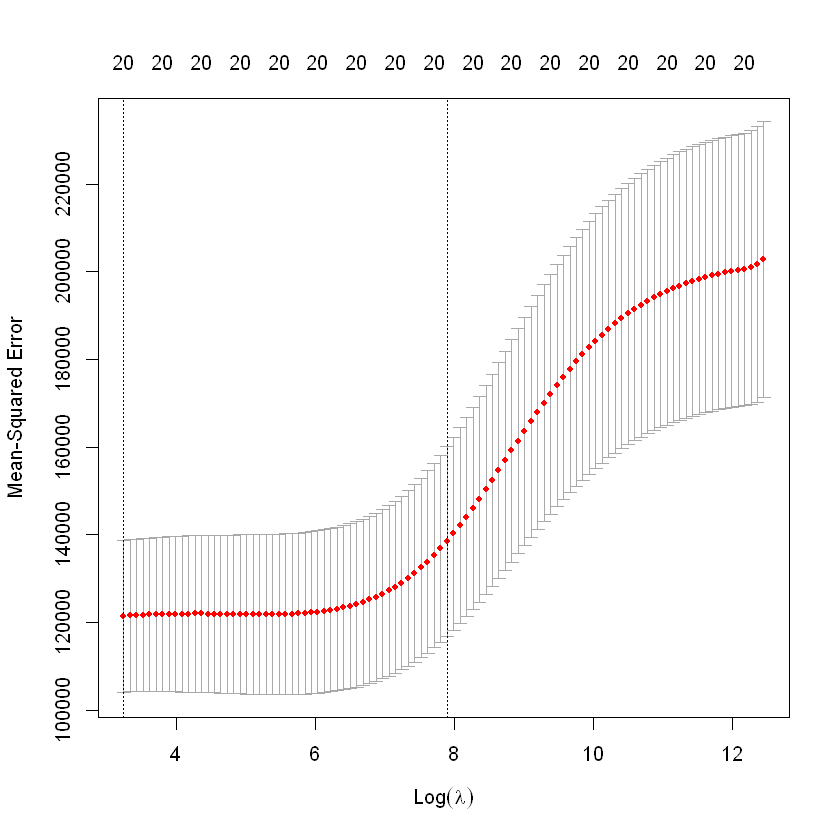

In [17]:
# Do k-fold cross-validation
cv.ridge <- cv.glmnet(x, y, alpha = 0)
plot(cv.ridge)

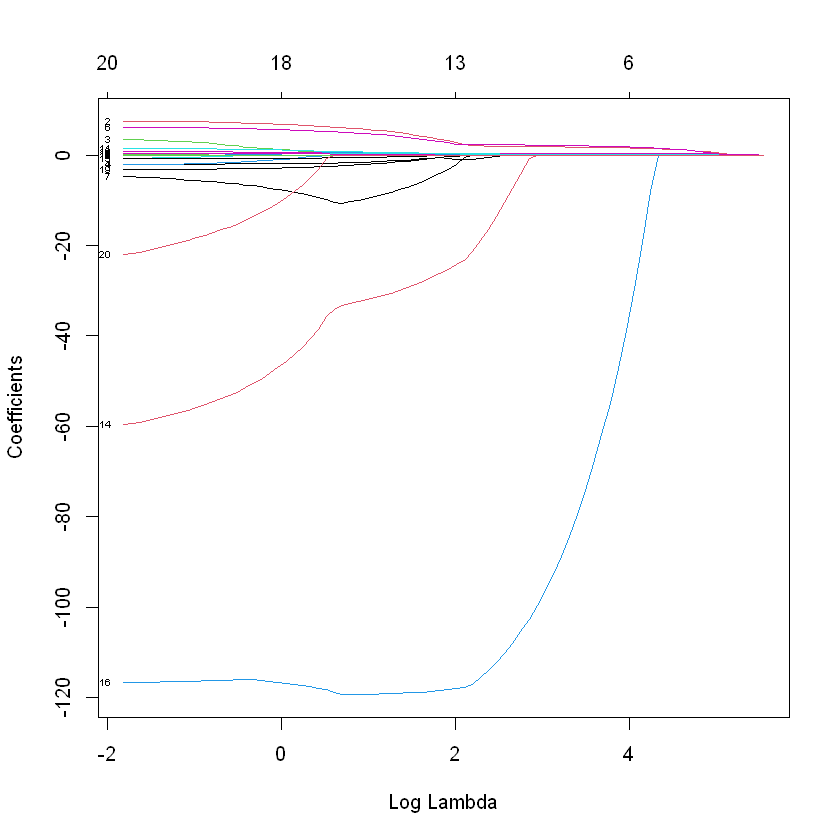

In [20]:
# Now we fit a Lasso model using alpha = 1 (default)
fit.lasso <- glmnet(x, y)
# Lasso is doing shrinkage AND variable selection.
plot(fit.lasso, xvar = "lambda", label = TRUE)

21 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 115.3773590
AtBat         .        
Hits          1.4753071
HmRun         .        
Runs          .        
RBI           .        
Walks         1.6566947
Years         .        
CAtBat        .        
CHits         .        
CHmRun        .        
CRuns         0.1660465
CRBI          0.3453397
CWalks        .        
LeagueA       .        
LeagueN       .        
DivisionW   -19.2435216
PutOuts       0.1000068
Assists       .        
Errors        .        
NewLeagueN    .        

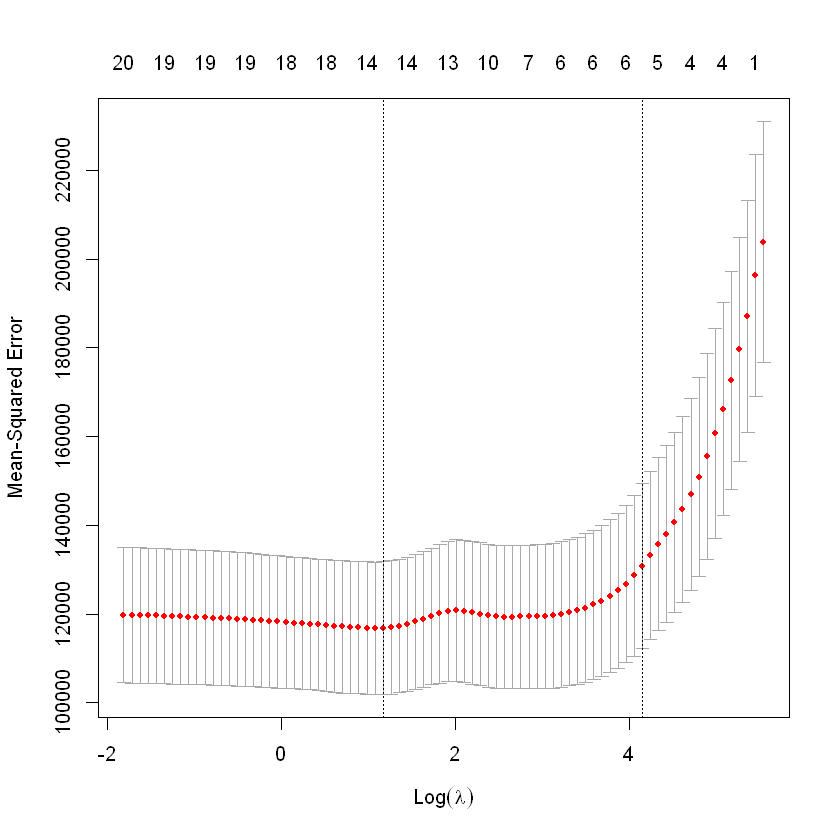

In [22]:
cv.lasso <- cv.glmnet(x, y)
plot(cv.lasso)
coef(cv.lasso)

In [28]:
train <- sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
# Suppose we want to use our earlier train/validation division to select the lambda for the lasso.
# x[train,] is all of the rows (and all corresponding columns) from our training data
# and y[train] is all the values in that vector that correspond to our training data.
lasso.tr <- glmnet(x[train, ], y[train])
# Degrees of freedom is number of nonzero coefficients. %deviance explained which is like R^2 for generalized linear models.
lasso.tr



Call:  glmnet(x = x[train, ], y = y[train]) 

   Df  %Dev  Lambda
1   0  0.00 233.200
2   2  4.30 212.500
3   2  9.19 193.600
4   2 13.25 176.400
5   2 16.62 160.700
6   3 20.40 146.400
7   3 23.93 133.400
8   3 26.86 121.600
9   4 29.34 110.800
10  4 31.43 100.900
11  5 33.18  91.970
12  5 34.69  83.800
13  5 35.94  76.360
14  5 36.98  69.570
15  6 37.98  63.390
16  7 38.89  57.760
17  7 39.66  52.630
18  7 40.30  47.960
19  7 40.83  43.700
20  7 41.27  39.810
21  7 41.63  36.280
22  7 41.94  33.050
23  7 42.19  30.120
24  7 42.40  27.440
25  7 42.57  25.000
26  7 42.72  22.780
27  8 43.20  20.760
28  8 43.91  18.910
29  8 44.53  17.230
30  8 45.04  15.700
31  9 45.71  14.310
32  9 46.52  13.040
33 10 47.17  11.880
34 12 47.75  10.820
35 12 48.38   9.862
36 12 48.88   8.986
37 11 49.25   8.188
38 11 49.47   7.460
39 12 49.95   6.798
40 12 50.38   6.194
41 13 50.78   5.643
42 13 51.26   5.142
43 13 51.65   4.685
44 13 51.98   4.269
45 13 52.25   3.890
46 13 52.47   3.544
47 13 52.66  

In [30]:
pred <- predict(lasso.tr, x[-train, ])
dim(pred)

[1] 262  98

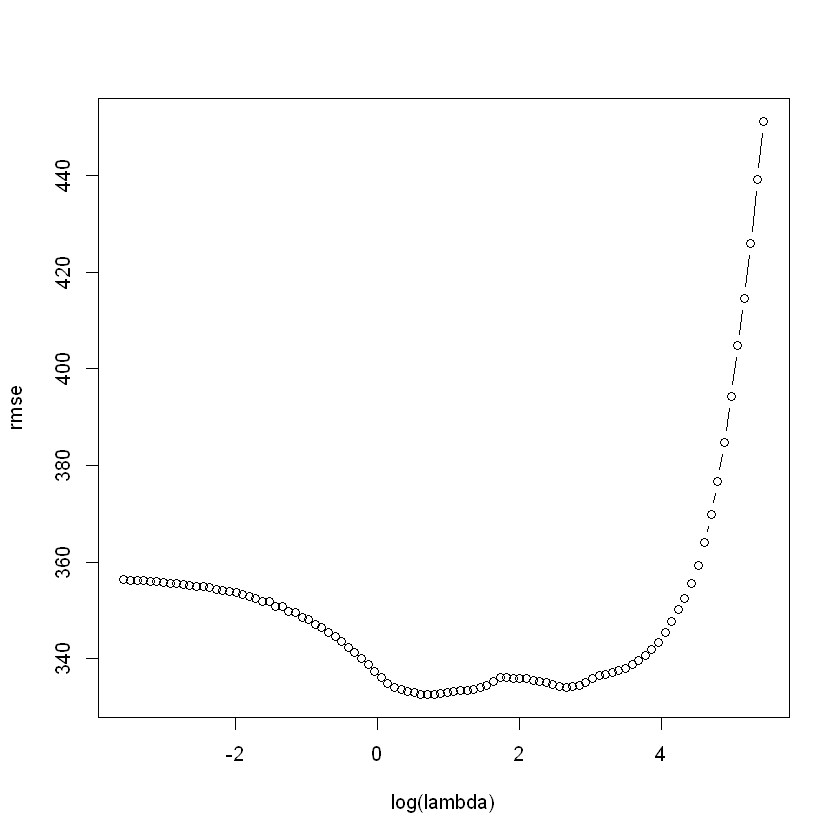

In [32]:
rmse <- sqrt(apply((y[-train] - pred)^2, 2, mean))
plot(log(lasso.tr$lambda), rmse, type = "b", xlab = "log(lambda)")